# 2HDM-General

This version writing in python has three stages, symbolic definition, numeric implementation and finaly analysis of allowed parameter space.

## First stage: symbolic definition

The first stage consiste on do symbolic definitions of our Higgs couplings. This first stage allow us do some simplification or manipulations of our couplings.

### Higgs couplings
In the most general context of 2HDM, the couplings $g_{hff}$ can be extracted of:

$$\mathcal{L}_Y^{hqq} = \frac{g}{2}\left(\frac{m_{d_{m}}}{m_{W}}\right) d_{m}\left[-\frac{\operatorname{sen} \alpha}{\cos \beta} \delta_{m n}+\frac{\sqrt{2} \cos (\alpha-\beta)}{g \cos \beta}\left(\frac{m_{W}}{m_{d_{m}}}\right)\left(\tilde{Y}_{2}^{d}\right)_{m n}\right] d_{n} h^{0}$$
$$+\frac{g}{2}\left(\frac{m_{u_{m}}}{m_{W}}\right) \bar{u}_{m}\left[\frac{\cos \alpha}{\operatorname{sen} \beta} \delta_{m n}-\frac{\sqrt{2} \cos (\alpha-\beta)}{g \operatorname{sen} \beta}\left(\frac{m_{W}}{m_{u_{m}}}\right)\left(\bar{Y}_{1}^{u}\right)_{m n}\right] u_{n} h^{0}$$

where $f$ represents fermions, $m_f$ and $m_W$ are the masses of $f$ and $W$ respectively, $\alpha$ and $\beta$ are the mixing angles of 2HDM general and finally $g$ is the $SU(2)$ coupling constant. Y denote Yukawa couplings which can be rewritten using Cheng and Sher anzats, as follows

$$\left(Y_{1}^{f}\right)_{i j} = \frac{\sqrt{m^f_i m^f_j}}{v}A_{ij}^f$$

In the case of $W$ and $Z$ Higgs couplings we have the next expressions:

$$g_{hVV} = g_V m_{V}\sin{(\alpha-\beta)}$$
where $m_V$ with $V = Z, W$. If we consider $C_{\alpha \beta} = \cos{(\alpha-\beta)}$

$$\alpha = \arctan{(\tan{(\beta)})} + \arccos{(C_{\alpha \beta})}$$
$$\sin{(\beta)} = \tan{(\beta)}\cos{(\arctan{(\tan{(\beta)})})}$$
$$\cos{(\beta)} = \sin{(\arctan{(\tan{(\beta)})})}/\tan{(\beta)}$$
then, $g_{hff}$ and $g_{hVV}$ are rewritten in term of $t_{\beta} = \tan{(\beta)}$ and $C_{\alpha \beta}$.

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

**Importing** `sympy` functions for symbolic calculations.

In [1]:
from sympy import symbols, init_printing, cos, sin, atan,plot
init_printing()

**Init symbolic variables**

We use `symbols` sympy function to init symbolic parameters, which are denoted by lowercase letters.

In [2]:
a,att,cab,tb = symbols('alpha,A_{tt},C_{ab},t_b',real=True)

#### Symbolic definition of $g_{hff}$ couplings

We use the symbolic constants predefined on `spacemathpy`, using the notation `constant['symbol']`, but first we import `spacemathpy`.

In [3]:
from spacemathpy import *

#### Symbolic definition of $g_{htt}$

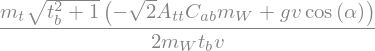

In [4]:
#2HDM-III
s = 'symbol'
ghtt = (g[s]/2)*(mt[s]/mW[s])*(cos(a)/(tb*cos(atan(tb))) - (sqrt(2)*cab/(g[s]*tb*cos(atan(tb)))*(mW[s]/mt[s])*(
                    mt[s]/SMvev[s]*att)))
    #(g/2) (mt/mW) ((Cos[a]/(tb*Cos[ArcTan[tb]])) + (Sqrt[2] Cab/(g*tb*Cos[ArcTan[tb]]) (mW/mt)*(mt/vev*Att)))
ghtt.simplify()

#### Symbolic definition of $g_{hbb}$

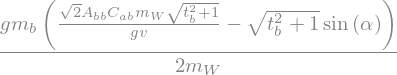

In [5]:
abb = symbols('A_{bb}',real=True)
ghbb = (g[s]/2)*(mb[s]/mW[s])*(((-sin(a)*tb)/sin(atan(tb))) + 
                (sqrt(2)*(cab*tb)/(g[s]*sin(atan(tb)))*(mW[s]/mb[s])*(mb[s]/SMvev[s]*abb)))
ghbb#.simplify()

### Symbolic definition of $g_{h\tau\tau}$

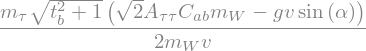

In [6]:
atautau = symbols(r'A_{\tau\tau}',real=True)
ghtautau = (g[s]/2)*(mtau[s]/mW[s])*(((-sin(a)*tb)/sin(atan(tb))) + 
                (sqrt(2)*(cab*tb)/(g[s]*sin(atan(tb)))*(mW[s]/mtau[s])*(mtau[s]/SMvev[s]*atautau)))
#(g/2) (mtau/mW) ((-Sin[a]*tb/Sin[ArcTan[tb]]) + (Sqrt[2] (Cab*tb)/(g*Sin[ArcTan[tb]]) (mW/mtau)*(mtau/vev*Atata)))

ghtautau.simplify()

#### Symbolic definition of $g_{hWW}$

In [7]:
sab = symbols('S_{ab}',real=True)
ghww =  gw[s]*mW[s]*sab
ghww

#### Symbolic definition of $g_{hZZ}$

In [8]:
ghzz =  gz[s]*mZ[s]*sab
ghzz

## Second stage: numeric implementations

The second stage consist in change our previous symbolic Higgs couplings to `numpy` functions by using sympy `lambdify` function. This function allow us to rewrite our symbolic coupling in term of numeric `numpy` functions. This function is imported from `sympy` as follows

In [9]:
from sympy import lambdify

Also we need the numeric values of our predefined constants which are showed with the notation `constant['numeric']`. However, `sympy` allow us substitute symbolic variables by numeric values using `python` dictionary with the structure `{symbol:value}`, and finally using the attribute `subs` of any symbolic `sympy` expression. But we have implemented a dictionary with all constants in `spacemathpy` in the next line.

In [10]:
num = numeric_substitutions('All')
num

### Numeric $g_{htt}$

In [11]:
ghtt_2hdm = lambdify([a,att,cab,tb],ghtt.subs(num),'numpy')
ghtt_2hdm(0.1,0.2,0.3,0.4)

### Numeric $g_{hbb}$

In [12]:
ghbb_2hdm = lambdify([a,abb,cab,tb],ghbb.subs(num),'numpy')
ghbb_2hdm(0.1,0.2,0.3,0.4)

### Numeric $g_{h\tau\tau}$

In [13]:
ghtautau_2hdm = lambdify([a,atautau,cab,tb],ghtautau.subs(num),'numpy')
ghtautau_2hdm(0.1,0.2,0.3,0.4)

### Numeric $g_{hWW}$

In [14]:
ghww_2hdm = lambdify([sab],ghww.subs(num),'numpy')
ghww_2hdm(0.1)

### Numeric $g_{hZZ}$

In [15]:
ghzz_2hdm = lambdify([sab],ghzz.subs(num),'numpy')
ghzz_2hdm(0.1)

### Third stage: analysis

The final stage is the own analysis. Now we define the numeric range to the parameters. To differentiate we denote them with the first letter uppercase. From `numpy` we use `np.random.uniform(a,b,n)` to create `n` randomly chosen points to each parameter in the range $[a,b]$, and create a dictionary which link our numeric parameters with its string name.

In [16]:
n = 100_000
Cab = np.random.uniform(-1,1,n)
Tb = np.random.uniform(0.1,50.0,n)
Att = np.random.uniform(0.999,1,n)
Abb = np.random.uniform(0.999,1,n)

In [25]:
THDM = HiggsCouplings()
THDM.model = '2HDM-FCNC'
THDM.ghtt = ghtt_2hdm(np.arccos(Cab) + np.arctan(Tb),Att,Cab,Tb)
THDM.ghbb = ghbb_2hdm(np.arccos(Cab) + np.arctan(Tb),Abb,Cab,Tb)
THDM.ghtautau = ghtautau_2hdm(np.arccos(Cab) + np.arctan(Tb),1,Cab,Tb)
THDM.ghWW = ghww_2hdm(np.sqrt(1-Cab**2))
THDM.ghZZ = ghzz_2hdm(np.sqrt(1-Cab**2))
THDM.gCH = 0.5
THDM.mCH = np.random.uniform(100,1000,n)

Also, we can name our model by means of `model` attribute of `HiggsSignalStrength`. This class by default has values equal to one for Higgs couplings with standard particles, 0 for Higgs couplings with charged scalars and 500 GeV for chaged scalar mass. Then we can show the initial parameter space of Higgs couplings show output of THDM.

In [26]:
THDM

2HDM-FCNC couplings
           ghtt      ghbb  ghtautau       ghWW       ghZZ  gCH         mCH
0     -0.732948 -0.018883 -0.008026  51.350687  66.089525  0.5  146.252933
1     -0.563570  0.007381  0.003119  49.852042  64.160735  0.5  343.243178
2     -0.771206 -0.021857 -0.009287  49.840638  64.146057  0.5  752.281228
3     -0.653500 -0.012041 -0.005121  51.237658  65.944054  0.5  712.027946
4     -0.805546 -0.047415 -0.020152  49.554392  63.777652  0.5  337.736684
...         ...       ...       ...        ...        ...  ...         ...
99995 -0.796721 -0.077654 -0.032968  32.133714  41.356835  0.5  865.263303
99996 -0.784203 -0.072271 -0.030683  30.783628  39.619243  0.5  765.824770
99997 -0.814171 -0.182419 -0.077469  31.932249  41.097545  0.5  119.245404
99998  0.345388  0.143461  0.060849   8.921371  11.482012  0.5  207.047040
99999 -0.658383 -0.167544 -0.071212  14.696146  18.914281  0.5  360.776299

[100000 rows x 7 columns]

Now, the method `parameter_space` from `HiggsSignalStrength` test each point of initial Higgs couplings parameter space and only save the points allowed by Higgs  Signals Strengths $R_X$ considering 1 or 2 $\sigma$ ranges and returns a dictionary with keys equal to each $R_X$ and its corresponding value equal to a `Pandas` `DataFrame` which stores the allowed parameter associated to $R_X$ constraints . In this case we obtain both ranges of allowed parameter spaces in the variables `THDMspace1` and `THDMspace2` corresponding to 1 and 2 $\sigma$ ranges, respectively.

In [27]:
?THDM.HiggsSignal_parameter_space

Signature: THDM.HiggsSignal_parameter_space(parameters, sigma=1)
Docstring:
HiggsSignal_space(parameters,sigma=1)

Parameters
----------
    parameter:dict
        python dictionary with keys equal to names 
        of the variables of which the Higgs couplings depends.
        The values are numpy array with initial values of 
        Higgs coupings.
    sigma: int
        Confidence level sigma equal to 1 or 2
        
Returns a python dict with keys associates to each 
Higgs signal strenght and as a value a DataFrame instance
with the values of the parameter space allowed by each Higgs 
Signal Stregth.
File:      ~/miniconda3/lib/python3.7/site-packages/spacemathpy/spacemath.py
Type:      method


In [28]:
parameters = {'cab':Cab,'tb':Tb,'Att':Att,'Abb':Abb}
THDMspace1 = THDM.HiggsSignal_parameter_space(parameters,sigma=1)
THDMspace2 = THDM.HiggsSignal_parameter_space(parameters,sigma=2)

The obtained Higgs coupling allowed parameter space (`THDMspace1` or `THDMspace2`) is related with the initial parameter space `Cab,Tb,Att,Abb` and we can extract the parameter space allowed by each particular Higgs signal strength by `THDMspaceX['RX']`. For example, for the $R_\tau$ and 2 $\sigma$ constraints we have

In [29]:
THDMspace2['Rtau']

,cab,tb,Att,Abb
0,0.087676,4.733759,0.999539,0.999818
1,-0.432360,17.110616,0.999705,0.999827
2,0.634110,2.262820,0.999454,0.999129
3,-0.044937,3.113381,0.999072,0.999959
4,-0.032865,6.560323,0.999107,0.999135
...,...,...,...,...
7797,-0.031451,10.937244,0.999478,0.999899
7798,-0.022313,7.396634,0.999476,0.999016
7799,0.063154,7.305819,0.999533,0.999319
7800,-0.011605,23.380661,0.999561,0.999458


where we observe that after the scan, it is obtained only 8215 points allowed by $R_\tau$ at 2 $\sigma$ of confidence level.

If we want the allowed paramater space after consider all Higgs Signals Strengths  constraints together we use `'Intersection'` index inside of square brackets as follows

In [30]:
THDMspace2['Intersection']

,cab,tb,Att,Abb


## Allowed parameter space plots

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Then we can plot the allowed parameter space by means of `plot.scatter` method of each `DataFrame` as follows

### $$R_{\tau}$$

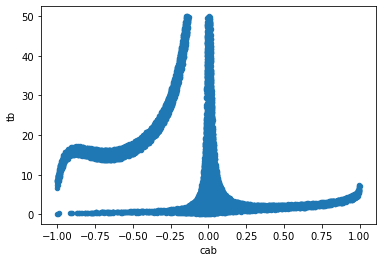

In [32]:
THDMspace2['Rtau'].plot.scatter(x='cab',y='tb');

In [33]:
Rtau.bound_2sd,Rtau.bound_2su

If we want customize our plot we can do it by for example

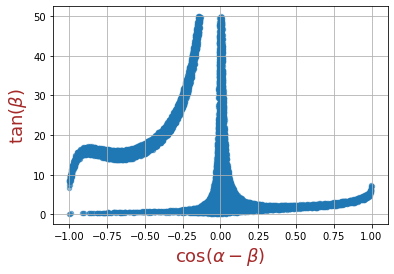

In [34]:
ax = THDMspace2['Rtau'].plot.scatter(x='cab',y='tb',grid=True,alpha=0.5);
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{b}$$

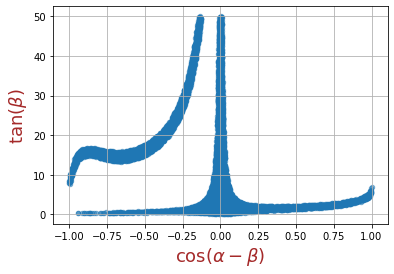

In [67]:
ax = THDMspace2['Rb'].plot.scatter(x='cab',y='tb',grid=True,alpha=0.5);
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{\gamma}$$

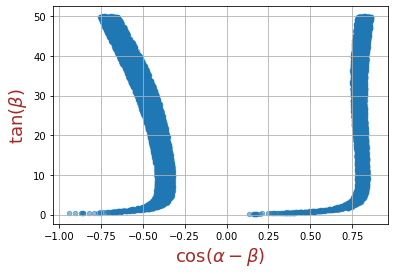

In [68]:
ax = THDMspace2['Rgamma'].plot.scatter(x='cab',y='tb',grid=True,alpha=0.5);
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{W}$$

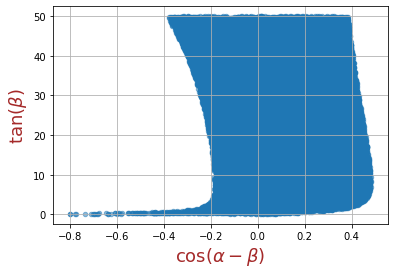

In [69]:
ax = THDMspace2['Rw'].plot.scatter(x='cab',y='tb',grid=True,alpha=0.5);
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{Z}$$

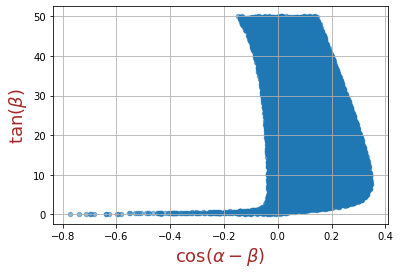

In [70]:
ax = THDMspace2['Rz'].plot.scatter(x='cab',y='tb',grid=True,alpha=0.5);
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

## Intersection

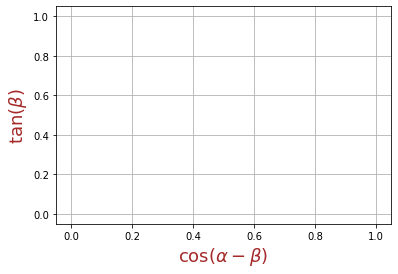

In [71]:
ax = THDMspace2['Intersection'].plot.scatter(x='cab',y='tb',grid=True,alpha=0.5);
#ax.tick_params(labelsize=15,grid_color='gray',grid_alpha=0.5,colors='gray')
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

In [50]:
import seaborn as sns

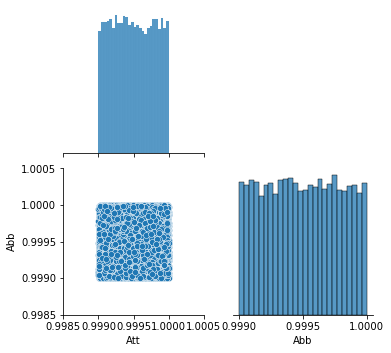

In [86]:
A = ['Att','Abb']
g = sns.PairGrid(THDMspace2['Rz'],corner=True,vars=A)#,hue='Escenario',vars=masas)
g.map_lower(sns.scatterplot)
#g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot)
g.axes[1,0].set_ylim(0.9985,1.0005)
g.axes[1,0].set_xlim(0.9985,1.0005)
#g.axes[3,1].set_ylim(0.99,1.01)
#g.axes[3,2].set_ylim(0.99,1.01)
g.add_legend()

Also, we can explore the behaviour of the total allowed parameter space using `scatter_matrix` function from `pandas` module as follows.

## All Rxs
Using directly matplotlib

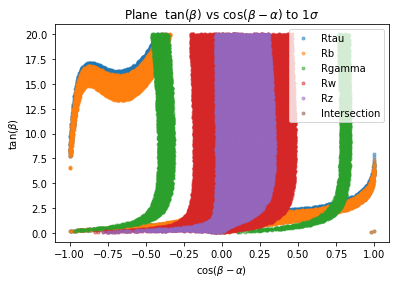

In [130]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsf = ['Rtau','Rb']
signalsV = ['Rw','Rz','Rgamma']
data2s = {signal:THDMspace2[signal] for signal in signals}
plt.figure()
for k in data2s.keys():
    plt.plot(data2s[k]['Cab'],data2s[k]['tb'],'.',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\beta-\alpha)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
plt.legend(loc=1);

In [38]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

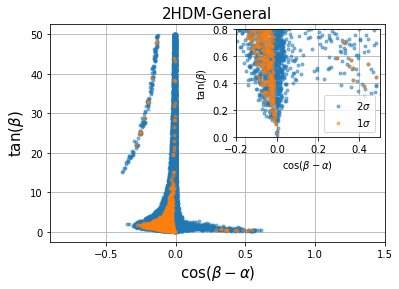

In [50]:
sigmaspace = {r'2$\sigma$':THDMspace2,r'1$\sigma$':THDMspace1}

fig, ax = plt.subplots(1, 1, figsize=[6, 4])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=1.5,xmin=-0.9)
ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-General',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=0.8,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()